<a href="https://colab.research.google.com/github/subhamomar123/Deep-Learning-Projects-DL-/blob/main/Handwritten_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

import random
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# This is the size of MNIST dataset 

In [10]:
len(y_train)


60000

In [5]:
len(X_test)

10000

In [6]:

X_train[0].shape


(28, 28)

In [ ]:
# As the image is of 28*28 each pixel is represented in form of a number

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# Picking and displaying a random sample image

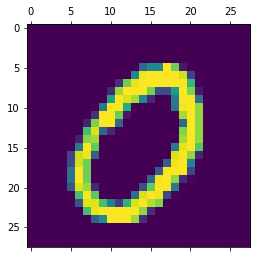

In [19]:
num = random.randint(0, 59999)
plt.matshow(X_train[num])

In [20]:
y_train[0]

5

In [ ]:
# Normalizing


In [21]:
X_train = X_train / 255
X_test = X_test / 255

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [24]:
X_train_flattened.shape

(60000, 784)

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9252


In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.9257


[0.26759475469589233, 0.9257000088691711]

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.3133308e-02, 5.4959384e-07, 6.1688632e-02, 9.6842712e-01,
       2.3247600e-03, 1.4783543e-01, 1.2726255e-06, 9.9985665e-01,
       9.9523336e-02, 7.1313822e-01], dtype=float32)

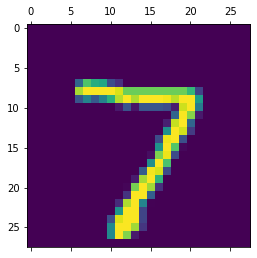

In [28]:

plt.matshow(X_test[0])

np.argmax finds a maximum element from an array and returns its index 

In [29]:
np.argmax(y_predicted[0])

7

In [30]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [31]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    6,   10,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    9,  918,   22,    7,    5,   13,   10,   39,    5],
       [   0,    0,   14,  931,    1,   23,    3,   11,   21,    6],
       [   1,    1,    2,    2,  917,    0,   13,    5,    9,   32],
       [   8,    3,    2,   39,   11,  768,   19,    6,   30,    6],
       [   7,    3,    6,    1,    7,   10,  920,    2,    2,    0],
       [   1,    6,   22,    9,    7,    1,    0,  950,    2,   30],
       [   6,   10,    6,   25,    9,   25,   11,   12,  863,    7],
       [   9,    7,    2,   11,   27,    6,    0,   23,    6,  918]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

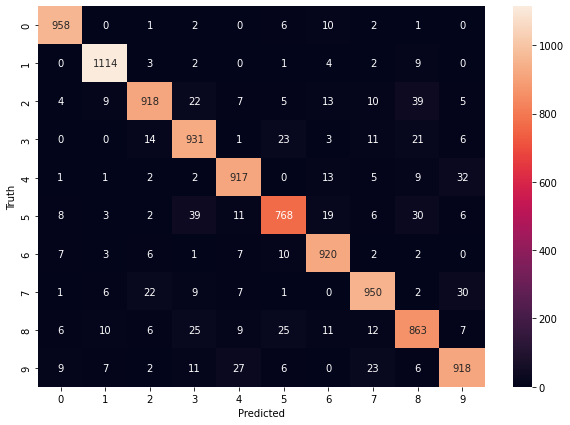

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2714 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1235 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0875 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0665 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0521 - accuracy: 0.9845


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9743


[0.08046745508909225, 0.9743000268936157]

Text(69.0, 0.5, 'Truth')

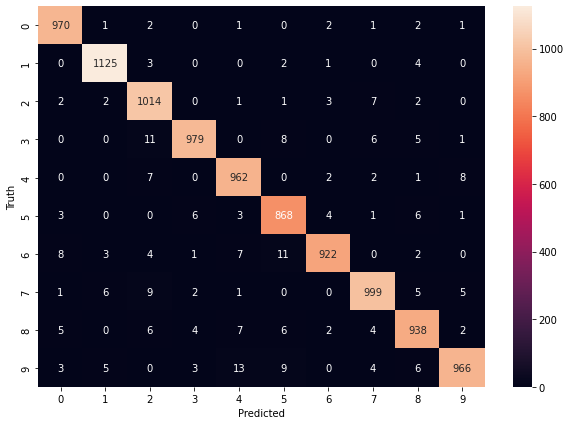

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Using Flatten layer so that we don't have to call .reshape on input dataset**

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2755 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1241 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0332 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9789


[0.07785312831401825, 0.9789000153541565]